# Model Selection
- Model selection is the task of statistically selecting a model from a set of candidate models.
- In the simplest cases, an existing data set is taken into account.
- The selection of the most suitable machine learning model for solving the problem or the selection of the parameters of this model is performed.
## Content:
1. Cross-Validation
    - Data Set Recognition and Preprocessing
    - Model Training with Cross-Validation
2. Grid Search Cross-Validation
    - Data Set Recognition and Preprocessing
    - Application of Grid Search Cross-Validation

## Cross-Validation
- Cross-validation is a model validation technique that tests how the results of a statistical analysis will generalize to an independent data set.
- It is primarily used to estimate how accurately a predictive system will perform in practice.
- K-fold cross-validation:
    - In K-fold cross-validation, we divide the data set into K different subsets.
    - We use K-1 subsets for training and the last subset as the test set, and we repeat this process K times.
    - The average error value obtained from K experiments indicates the validity of our model.
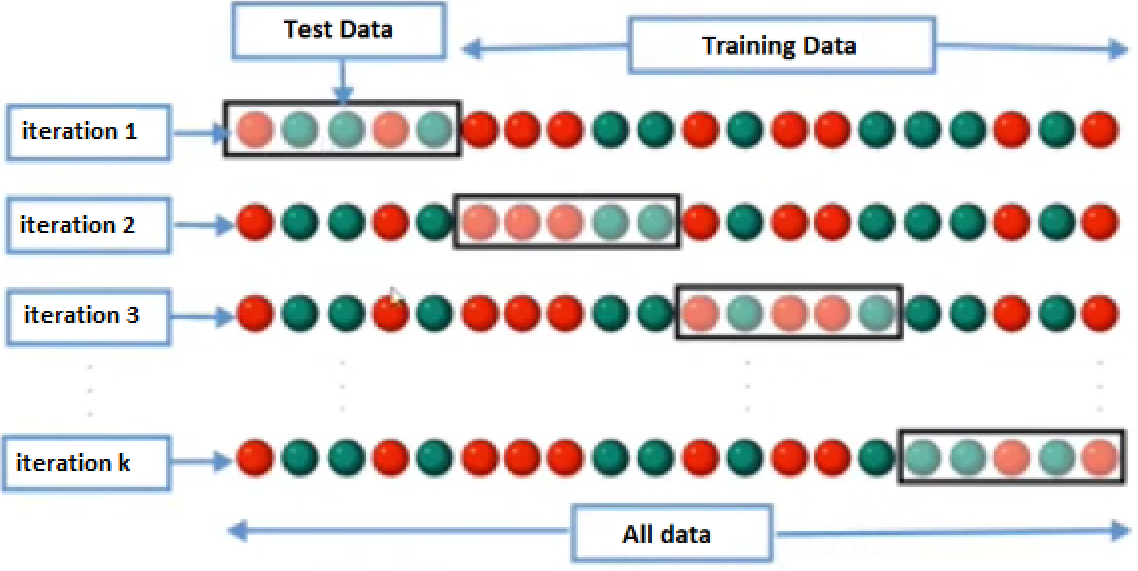

### Data Set Recognition and Preprocessing
- We will work with the Iris data set that we have used in previous lessons.

In [1]:
# Import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn iris data set
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X = iris.data  # features
y = iris.target  # class

In [2]:
# Normalization
X = (X - np.min(X)) / (np.max(X) - np.min(X))

In [5]:
from sklearn.model_selection import train_test_split
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Model Training with Cross-Validation
- Let's create our machine learning model that we will use in cross-validation.
- Let this model be K-Nearest Neighbors.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# 3 Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [8]:
# Let's do 10-fold cross-validation
from sklearn.model_selection import cross_val_score

number_of_folds = 10
accuracies = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=number_of_folds)

print("Average Accuracy:", np.mean(accuracies))
print("Standard Deviation of Accuracies:", np.std(accuracies))

Average Accuracy: 0.9518181818181819
Standard Deviation of Accuracies: 0.06581341017359368


- Our average accuracy value is 95%.
- The standard deviation of the accuracies is 0.04. The low value of this indicates that the parameters of our model are sufficiently good.

## Grid Search Cross-Validation
- In machine learning, a hyperparameter is a parameter used to control the learning process.
- For example, the K value used in the K-Nearest Neighbors algorithm is a hyperparameter. It is necessary to select this hyperparameter.
- Grid search cross-validation is used in the selection of hyperparameters that directly affect the performance of the model.

### Grid Search Cross-Validation Application
- The parameter we will search for the optimal value using grid search is the K value in the K-Nearest Neighbors model.

In [10]:
from sklearn.model_selection import GridSearchCV
grid = {"n_neighbors": np.arange(1, 50)}
knn_grid = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_grid, grid, cv=10)  # GridSearchCV
knn_cv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [11]:
print("Best K value:", knn_cv.best_params_)
print("Best accuracy score according to the best K value:", knn_cv.best_score_)

Best K value: {'n_neighbors': 13}
Best accuracy score according to the best K value: 0.9800000000000001


## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}  # L1 = Lasso and L2 = Ridge

logreg = LogisticRegression(solver='liblinear', max_iter=150)  # Increase max_iter
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X, y)

print("Best hyperparameters:", logreg_cv.best_params_)
print("Best accuracy score according to the best hyperparameters:", logreg_cv.best_score_)

Best hyperparameters: {'C': 100.0, 'penalty': 'l1'}
Best accuracy score according to the best hyperparameters: 0.9666666666666668
